# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Random Forest - Regression</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

Random Forests, hem sınıflandırma (classification) hem de regresyon (regression) problemleri için kullanılabilen esnek bir makine öğrenimi yöntemidir. Her iki kullanım arasındaki temel farklar şu şekildedir:

**Random Forests Sınıflandırma (Classification)**
* **Amaç**: Veri setindeki örnekleri belirli kategorilere sınıflandırmak.
* **Çıktı Tipi**: Discrete  label (örneğin, 'kedi', 'köpek', 'kuş' gibi).
* **Karar Süreci**: Her karar ağacı bir sınıf etiketi tahmini yapar, ve tüm ağaçların tahminleri arasından en çok oy alan sınıf nihai tahmin olarak seçilir (çoğunluk oyu yöntemi).
* **Performans Değerlendirmesi**: Doğruluk oranı, karışıklık matrisi, hatırlama, hassasiyet, F1 skoru gibi sınıflandırma metrikleri ile değerlendirilir.
* **Uygulama Örneği**: E-postaları 'spam' veya 'spam değil' olarak sınıflandırmak.
**Random Forests Regresyon (Regression)**
* **Amaç**: Sürekli bir çıktıyı (sayısal değer) tahmin etmek.
* **Çıktı Tipi**: Continuous sayısal değerler (örneğin, bir evin fiyatı, sıcaklık değeri gibi).
* **Karar Süreci**: Her karar ağacı bir sayısal değer tahmini yapar, ve tüm ağaçların tahminlerinin ortalaması (veya bazen medyanı) nihai tahmin olarak kullanılır.
* **Performans Değerlendirmesi**: Ortalama Karesel Hata (MSE), Ortalama Mutlak Hata (MAE), R-kare gibi regresyon metrikleri ile değerlendirilir.
* **Uygulama Örneği**: Bir evin satış fiyatını tahmin etmek.

Her iki durumda da, Random Forests yöntemi birden fazla karar ağacını kullanır ve bu ağaçların tahminlerini birleştirir. Ancak, sınıflandırma ve regresyon arasındaki temel fark, tahmin edilen çıktı türü ve bu tahminlerin nasıl birleştirildiğidir. Sınıflandırmada, sonuçlar kategori etiketleridir ve çoğunluk oyu ile belirlenirken, regresyonda sonuçlar sürekli sayısal değerlerdir ve genellikle ortalama veya medyan alınarak elde edilir.

# Exploratory Data Analysis (EDA)

**About Dataset**

- **Car_Name**: Arabanın adı veya modeli.
- **Year**: Arabanın üretim yılı.
- **Selling_Price**: Arabanın satış fiyatı.
- **Present_Price**: Arabanın şu anki showroom fiyatı.
- **Kms_Driven**: Satış noktasına kadar arabayla gidilen toplam kilometre.
- **Fuel_Type**: Arabanın kullandığı yakıt tipi.
  - **Petrol**: Benzinle çalışan araçları ifade eder.
  - **Diesel**: Dizel yakıtla çalışan araçları belirtir.
  - **CNG**: Sıkıştırılmış doğal gazla (CNG) çalışan araçları tanımlar.
- **Seller_Type**: Arabayı satan satıcı tipi.
  - **Dealer**: Ticari operasyonlarının bir parçası olarak araç satan işletmeleri ifade eder.
  - **Individual**: Kişisel bir aracını satan özel bireyleri belirtir.
- **Transmission**: Arabanın sahip olduğu şanzıman tipi.
  - **Manual**: Sürücünün manuel olarak vites değiştirdiği araçları tanımlar.
  - **Automatic**: Vites değiştirme işleminin otomatikleştirildiği araçları ifade eder.
- **Owner**: Arabanın önceki sahiplerinin sayısı.
  - **First Owner**: Aracın orijinal sahibi tarafından satıldığını gösterir.
  - **Second Owner**: Aracın mevcut satıcıdan önce bir önceki sahibi olduğunu belirtir.
  - **Third Owner**, ve böyle devam eder.

Bu veri seti, bir arabanın özelliklerine dayalı olarak satış fiyatının tahmin edilmesi içindir.

-------------------------------------------------------------------------------------------------------------------------------

- **Car_Name**: The name or model of the car.
- **Year**: The year of manufacture of the car.
- **Selling_Price**: The selling price of the car.
- **Present_Price**: The current showroom price of the car.
- **Kms_Driven**: The total kilometers driven by the car up to the point of sale.
- **Fuel_Type**: This column would contain categories such as:
  - **Petrol**: Cars that run on petrol fuel.
  - **Diesel**: Cars that use diesel fuel.
  - **CNG**: Cars that are powered by compressed natural gas.

- **Seller_Type**: This column would indicate the type of seller offering the car, which could be:
  - **Dealer**: A business that sells cars as part of its commercial operations.
  - **Individual**: A private individual selling a personal vehicle.

- **Transmission**: This refers to the gearbox system of the car, with common types being:
  - **Manual**: Cars where the driver manually shifts gears.
  - **Automatic**: Cars where the gear shifting process is automated.

- **Owner**: This would typically be a numeric column indicating the number of previous owners of the car, but if it is categorical, it might have entries such as:
  - **First Owner**: Indicates the car is being sold by its original owner.
  - **Second Owner**: Indicates the car has had one previous owner before the current seller.
  - **Third Owner**, and so on.
  
This data set is for estimating the selling price of a car based on its features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df0 = pd.read_csv("car_dataset.csv")
df = df0.copy()

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Random Forest ile Aykırı Değerlerin İşlenmesi**

Random Forest, veri setlerindeki aykırı değerlere (outliers) karşı doğal bir dayanıklılık gösterir. Bu özelliği, karar ağaçları tabanlı bir ensemble (toplu) model olmasından kaynaklanır.

**Random Forest ve Aykırı Değerler**
- **Doğal Dayanıklılık**: Random Forest, her bir karar ağacını veri setinin rastgele bir alt kümesinden öğrenir. Bu, modelin aykırı değerlerden etkilenme riskini azaltır.
- **Sonuçların Belirlenme Yöntemi**: Model sonuçları, birden fazla ağacın ortalaması veya çoğunluk oyu ile belirlenir. Bu yaklaşım, tek bir aykırı değerin model üzerinde aşırı bir etki yapmasını önler.
- **Aykırı Değerlerin Gerçekliği**: Bazı durumlarda, aykırı değerler veri setinin gerçek bir parçasıdır ve önemli bilgiler içerebilir. Random Forest, bu tür gerçek aykırı değerleri dikkate alarak modeli eğitebilir.

**Uygulama Önerileri**
- **Aykırı Değerleri Dikkate Alma**: Random Forest kullanırken, aykırı değerlerin modelleme sürecinde otomatik olarak yönetildiğini göz önünde bulundurun.
- **Veri Ön İşleme**: Aykırı değerlerin varlığı, modelin doğruluğunu etkileyebilir. Gerekli durumlarda, veri ön işleme adımlarıyla bu değerlerin etkisini azaltabilirsiniz.
- **Model Değerlendirme**: Modeli değerlendirirken, aykırı değerlerin modelin genel performansına etkisini gözlemleyin.

Sonuç olarak, Random Forest modeli, aykırı değerlere karşı dayanıklı bir yapıya sahiptir ve bu değerlerin model üzerindeki etkisini doğal yollarla azaltabilir. Bu özellik, modelin çeşitli veri setlerinde etkili bir şekilde kullanılmasını sağlar.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


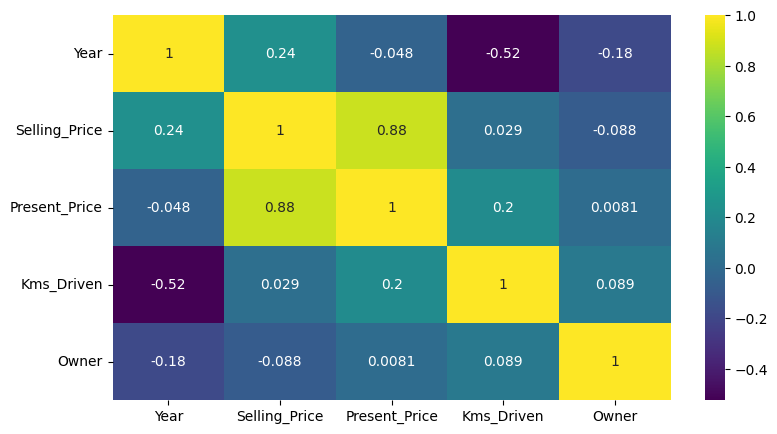

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")
plt.show()

In [9]:
import plotly.graph_objects as go

numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

heatmap = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='Magma',  # Renk skalası
    zmin=-1,
    zmax=1,  # Renk skalası için minimum ve maksimum değerler
)

fig = go.Figure(data=[heatmap])

fig.update_layout(
    title='Korelasyon Matrisi Heatmap',
    width=700,  
    height=500,  
)

fig.show()

In [10]:
df["Vehicle_Age"] = 2024 - df.Year

# Datamızdaki araç üretim yılını age featurune dönüştürüyoruz.

**Yüksek Kartinaliteli (Çok Fazla Benzersiz Değer İçeren) Özelliklerin İşlenmesi**

Veri setlerinde bazen çok fazla benzersiz değer içeren özellikler (high cardinality features) bulunabilir. Bu tür özelliklerin model üzerindeki etkisini değerlendirmek ve ona göre karar vermek önemlidir.

**Yüksek Kartinaliteli Özelliklerin Değerlendirilmesi**
1. **Özelliklerin Etkisi**: Bazı durumlarda, çok sayıda benzersiz değere sahip özellikler, modelin performansını olumlu veya olumsuz etkileyebilir.
2. **Skor Karşılaştırması**: Modelin bu özelliği içerip içermemesine bağlı olarak performansını karşılaştırmak, özelliğin önemini belirlemeye yardımcı olabilir.

**Uygulama Adımları**
- **Özelliği Düşürmeden Modelleme**: İlk olarak, özelliği modellemeye dahil ederek modelin performansını değerlendirin.
- **Özelliği Düşürerek Modelleme**: Daha sonra, aynı modeli bu özelliği düşürerek tekrar değerlendirin.
- **Sonuçların Karşılaştırılması**: Her iki durumda elde edilen skorları karşılaştırın. Hangi durumda daha iyi sonuçlar elde edildiyse, o yaklaşımı tercih edin.

In [11]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [12]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

# kategorik featurların kaç unique gözlemden oluştuğu görüyoruz
# car_name'in unique kategorik gözlem sayısı datamızdaki toplam gözlem sayısına nazaran çok yüksek

Column: Car_Name
------------------------------
Unique Values (98): ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS 

In [13]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

# 301 gözlemim olmasına rağmen car_name'de 98 tane unique araba/motor markası mevcut
# Bu featura ordinal encoder uygulayarak numeric verilere dönüştürmek anlamlı bir hareket tarzı olmayacak
# Çünkü DT modeli high cardinality categorical featureslara (çok fazla unique kategorik gözlemler içeren featurlar)
# daha fazla önem yükleme eğilimindedir.
# Bu da bu featurların feature importanceda daha ön plana çıkmasına sebep olur
# Ayrıca  çoğu marka ve modelden 1-2 adet mevcut. Doğal olarak eğitime bir katkısı olmayacağından bu featura kaldırıyoruz
# Araç üretim yılı olan Year ı da Age feature ına dönüştrdüğümüzden Year featurenıda car_name ile birlikte kaldırıyoruz

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,10
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,11
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,7
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,13
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,10


<Figure size 1200x600 with 0 Axes>

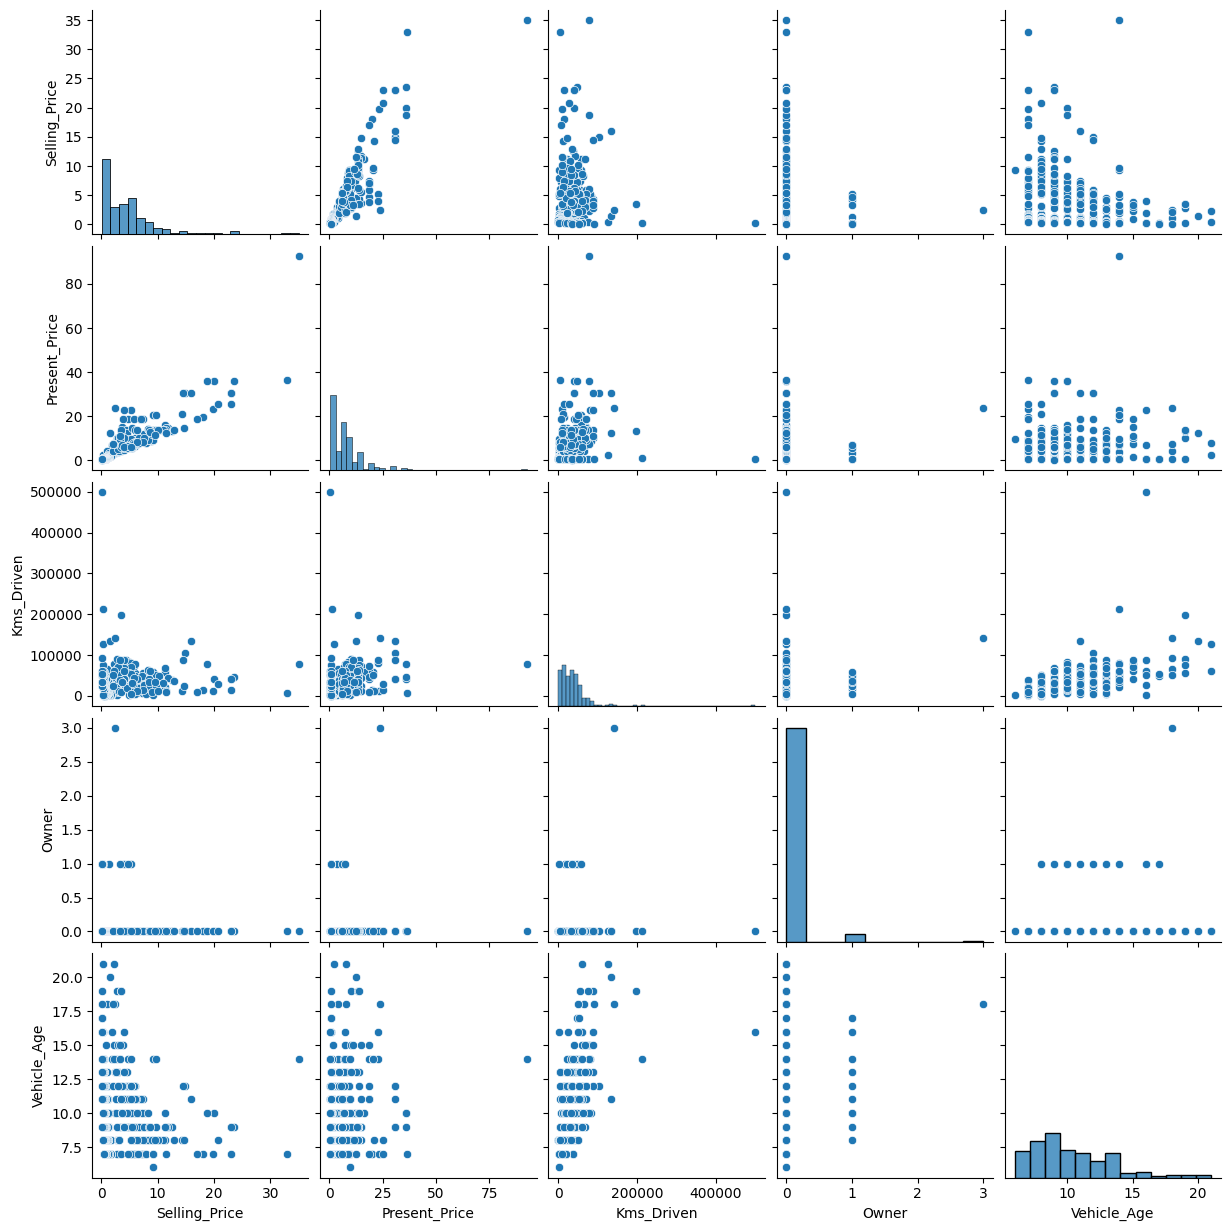

In [15]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, palette="Dark2");

In [16]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df['Selling_Price']], ['Selling Price'],
                         show_hist=True,
                         show_rug=True)

fig.update_layout(
    title_text='Distribution and Box Plot of Selling Prices',  # Başlık metni
    title_font_size=20,  # Başlık font büyüklüğü
    xaxis_title_text='Selling Price',  # X eksen başlığı
    yaxis_title_text='Density',  # Y eksen başlığı
    template='plotly_white',  # Arka planı beyaz yapıyoruz
    width=1000,  # Grafiğin genişliği
    height=500,  # Grafiğin yüksekliği
    bargap=0.01,  # Barlar arası boşluk
)

fig.show()

# tree based modeller outlierlara karşı çok robustdur(güçlüdür).
# Ancak küçük regression datalarında bu durum geçerli değildir.
# Küçük regression datalarında outlier dağerler düştüğü yapraklardaki ortalama fiyatları ciddi şekilde yükseltebiliğinden
# veya azaltabildiğinden eğitim için yetersiz olan bu outlier gözlemleri düşürmek tree based modellerde önem arzediyor.
#Ancak her zaman olduğu gibi hem outlierlar ile hem de outlierları düşürerek skorları karşılaştırıp farklarını görmeliyiz

# show_rug parametresi, veri noktalarının her birinin konumunu x ekseninde bir çizgi ile gösterir.
# Bu her bir gözlemin dağılımını ve yoğunluğunu daha ayrıntılı bir şekilde görmek için kullanışlıdır.

# Rug plot, genellikle histogram veya kernel density estimate (KDE) çizimlerinin altında yer alır.
# Her bir veri noktasını temsil eden küçük dikey çizgiler, veri setindeki değerlerin nerede yoğunlaştığını ve
# potansiyel olarak outlier ların nerede bulunduğunu gösterir.
# Bu özellik, veri setinin dağılımını anlamada faydalıdır çünkü rug plotlar veri noktalarının yığılma alanlarını ve
# nadir bulunan bölgeleri net bir şekilde gösterir.

In [17]:
import plotly.graph_objs as go

box_plot = go.Box(y=df['Selling_Price'], name='Selling Price')

fig = go.Figure(data=[box_plot])
fig.update_layout(title='Selling Price Box Plot')
fig.show()

# Modelling

## Train test split

In [18]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,10
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,11
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,7
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,13
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,10


In [19]:
X = df.drop(columns='Selling_Price', axis=1)
y = df['Selling_Price']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [21]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (270, 7)
Train target shape   :  (270,)
Test features shape  :  (31, 7)
Test target shape    :  (31,)


## Modeling for Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(random_state=1)

In [23]:
cat = X_train.select_dtypes('object').columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OrdinalEncoder


In [25]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ord_enc

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [26]:
column_trans = make_column_transformer((ord_enc, cat), remainder= 'passthrough')
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
operations = [('OrdinalEncoder', column_trans), ('DT_model', DecisionTreeRegressor(random_state=1))]

In [29]:
pipe_model = Pipeline(steps=operations)

In [30]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=1))])

In [31]:
def train_val(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    scores = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "mae": mean_absolute_error(y_train, y_train_pred),
            "mse": mean_squared_error(y_train, y_train_pred),
            "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        "test": {
            "R2": r2_score(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred),
            "rmse": np.sqrt(mean_squared_error(y_test, y_pred))
        }
    }
    return pd.DataFrame(scores)

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [33]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.931
mae,0.000,0.511
mse,0.000,0.497
rmse,0.000,0.705


In [34]:
from sklearn.model_selection import cross_validate, cross_val_score
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]
# overfiting olduğunu teyit ettik

test_r2                              0.860
train_r2                             1.000
test_neg_mean_absolute_error        -0.849
train_neg_mean_absolute_error       -0.000
test_neg_mean_squared_error         -4.423
train_neg_mean_squared_error        -0.000
test_neg_root_mean_squared_error    -1.771
train_neg_root_mean_squared_error   -0.000
dtype: float64

## Modelling with Pipeline & ColumnTransformer

**Tree-Based Modellerde Encoder Kullanımı**

Tree-based modellerde, özellikle karar ağaçları ve Random Forest gibi algoritmalar, kategorik verileri işleme şekli nedeniyle encoder kullanımını gerektirebilir.

**Encoder Kullanımının Avantajları**
- **Feature Sayısının Kontrolü**: Encoder kullanmak, özellikle çok sayıda kategorik değişkeni olan veri setlerinde, modelin karmaşıklığını ve işlem yükünü azaltır. Dummies uygulandığında feature sayısının önemli ölçüde artması, modelin hem eğitim süresini hem de karmaşıklığını artırabilir.
- **Tree-Based Modeller ve Encoder**: Karar ağaçları ve Random Forest gibi modeller, encoder ile dönüştürülmüş kategorik verileri etkili bir şekilde işleyebilir. Bu modeller, kategorik değişkenlerin sayısallaştırılmasını kolaylaştırır ve dummies kullanımına göre daha az özellik ile çalışabilir.

**Uygulama Önerileri**
- **Encoder Kullanımı**: Kategorik değişkenler için encoder (Label Encoder, Ordinal Encoder vb.) kullanarak verileri modellemeye hazırlayın.
- **Model Performansını Değerlendirme**: Encoder kullanımı sonrası modelin performansını değerlendirin ve dummies kullanıldığında elde edilen sonuçlarla karşılaştırın.

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
operations = [('OrdinalEncoder', column_trans), ('RF_model', RandomForestRegressor(random_state=1))]

In [37]:
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model', RandomForestRegressor(random_state=1))])

In [38]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.985,0.544
mae,0.247,0.717
mse,0.413,3.307
rmse,0.643,1.819


In [39]:
from sklearn.model_selection import cross_validate, cross_val_score
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(random_state=1))]
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=20,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]
# overfiting olduğunu teyit ettik

test_r2                              0.922
train_r2                             0.987
test_neg_mean_absolute_error        -0.660
train_neg_mean_absolute_error       -0.248
test_neg_mean_squared_error         -2.480
train_neg_mean_squared_error        -0.373
test_neg_root_mean_squared_error    -1.233
train_neg_root_mean_squared_error   -0.608
dtype: float64

In [40]:
# Ortalama Hata oranı kontrolü
1.23 / y.mean() # test setinde yaptigi hata

0.2638751291828516

In [41]:
0.608 / y.mean() # train setinde yaptigi hata

0.13043583621396243

**Regression ve Classification Analizlerinde "Pure" Modeller**

Makine öğrenmesi ve istatistikte, bir modelin "pure" (saf) olması, modelin verileri mükemmel bir şekilde tahmin ettiği veya sınıflandırdığı anlamına gelir. Ancak, bu durumun gerçek dünya verileriyle çalışırken nadiren mümkün olduğunu anlamak önemlidir.

**Regression Analizlerinde "Pure" Modeller**
- **Zorluk**: Regression analizlerinde bir modelin "pure" olması, yani train setindeki tüm verileri mükemmel bir şekilde tahmin etmesi, genellikle çok zordur.
- **Overfitting Riski**: Train setinde çok yüksek, ancak test setinde düşük skorlar alınıyorsa, bu durum modelin verilere overfitting yaptığının bir işareti olabilir. Yani model, eğitim verilerine aşırı uyum sağlamış ancak yeni verilere iyi genelleştirme yapamıyor olabilir. Buna karşılık, train ve test seti skorlarının birbirine yakın olması, modelin verilere iyi genelleştirdiğini gösterebilir.

**Classification Analizlerinde "Pure" Modeller**
- **Mümkünlük**: Classification analizlerinde bazen "pure" skorlar elde edilebilir. Bu, modelin veri setindeki sınıfları mükemmel bir şekilde ayırdığı anlamına gelir.
- **Dikkat**: Ancak, bu durum her zaman ideal olmayabilir. Çünkü mükemmel sınıflandırma, bazen modelin eğitim verilerine aşırı uyum sağlaması (overfitting) nedeniyle olabilir.

**Cross Validation (Çapraz Doğrulama)**
- **Önemi**: Modelin performansını daha iyi değerlendirmek için cross validation kullanmak önemlidir. Cross validation, modelin farklı veri alt kümeleri üzerindeki performansını test ederek daha güvenilir sonuçlar elde edilmesini sağlar.
- **Uygulama**: Cross validation skorları, modelin tek seferlik skorlarıyla uyumlu olduğunda, modelin genelleştirme kabiliyetinin daha güçlü olduğunu gösterir.

Sonuç olarak, hem regression hem de classification modellerinde, modelin "pure" olması her zaman mümkün veya ideal olmayabilir. Modelin genelleştirme yeteneğini değerlendirmek için cross validation gibi yöntemler kullanılmalıdır.

## Outlier handling to improve scores¶

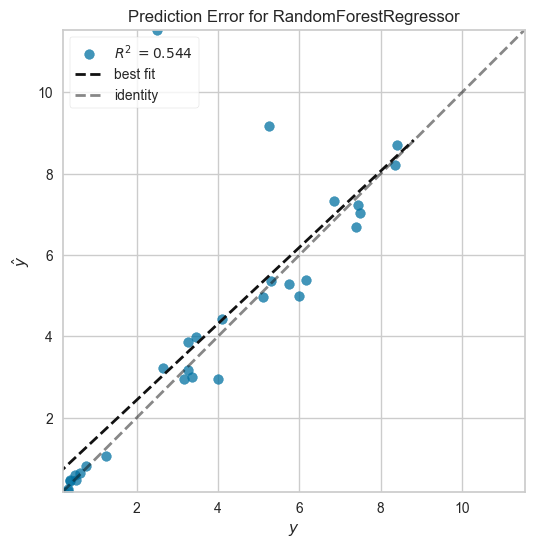

In [42]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# 10 dan büyük fiyatların tahminleri bozduğunu gördük.

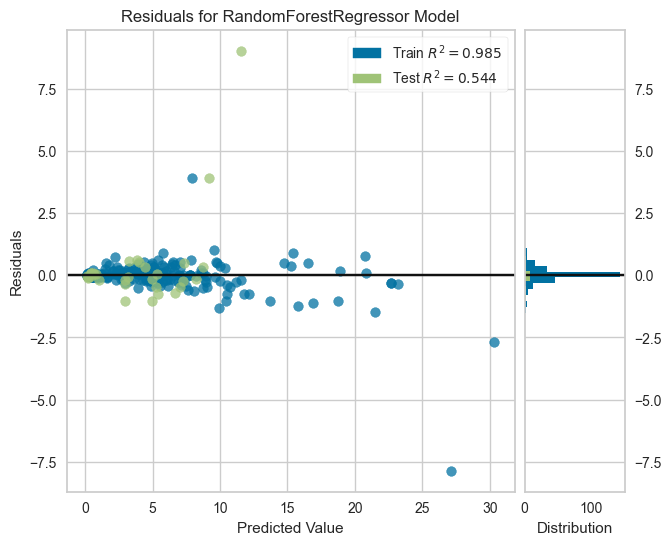

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(720, 600))
model = pipe_model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

# Burda da 10 dan büyük fiyatların tahminleri bozduğunu gördük.
# Ayrıca overfiting olduğunu da buradan söyleyebiliriz

## Visualizing Trees

## Grid Search

**criterion**

1. **squared_error**:
   - Bu, bölünme kalitesini değerlendirmek için kullanılan ortalama karesel hata (MSE) kriteridir.
   - Her düğümde, ortalama karesel hatayı minimize etmeye çalışarak en iyi bölünmeyi bulur.
   - Bu, genellikle varsayılan kriterdir ve ağacın hedef değişken üzerindeki varyansı azaltmasını sağlar.

2. **friedman_mse**:
   - Bu kriter, ünlü istatistikçi Jerome Friedman tarafından geliştirilen ve geliştirilmiş bir karesel hata ölçüsüdür.
   - 'friedman_mse' genellikle gradyan artırma ağaçlarıyla (gradient boosting trees) kullanılır ve ağacın bölünmelerini iyileştirmek için ek bir düzeltme terimi içerir.
   - Bu kriter, özellikle gradyan artırma modellerindeki performansı artırmak için kullanılır.

3. **absolute_error**:
   - Bu kriter, bölünme kalitesini belirlemek için ortalama mutlak hatayı (MAE) kullanır.
   - Aykırı değerlerin etkisini azaltmak için tercih edilen bir kriterdir çünkü karesel değil, mutlak farkları hesaba katar.
   - Hesaplama açısından daha maliyetli olabilir, çünkü mutlak değer fonksiyonunun türevi her noktada tanımlı değildir.

4. **poisson**:
   - Bu kriter, regresyon hedeflerinin Poisson dağılımı gösterdiği durumlar için uygundur. Örneğin, sayım verisi veya olay oranları gibi.
   - Poisson kaybı, bir hedef değişkenin gerçek sayımlar üzerindeki tahminlerinin kalitesini değerlendirmek için kullanılır.
   - Poisson regresyonu, özellikle hedef değişken bir sayma sayısı olduğunda (örneğin, bir zaman aralığında gerçekleşen olayların sayısı gibi) ve hata terimlerinin varyansı ortalama değerlerle orantılı olduğunda kullanılır.

**Random Forest Regression'da 'max_features' Parametresinin Önemi ve Root Node Seçimi**

Random Forest Regression modellerinde 'max_features' parametresinin kullanımı ve bu parametrenin ağaçlardaki root node seçimi üzerindeki etkisini incelemek önemlidir.

**'max_features' Parametresi ve Etkisi**
- **Default Değer**: Random Forest Regression'da 'max_features' parametresinin default değeri genellikle 'auto' (eskiden) ya da 1.0 (yeni) olarak belirlenir. Bu, modelin her ağacı oluştururken tüm özellikleri (features) kullanacağı anlamına gelir.
- **Root Node Seçimi**: Her ağaçta tüm özellikler kullanıldığında, genellikle modelin her ağacında aynı root node'un seçilme ihtimali artar. Bu durum, modelin çeşitliliğini azaltabilir ve overfitting riskini artırabilir.

**'max_features' Parametresinin Özelleştirilmesi**
- **GridSearch Önerisi**: GridSearch yaparken 'max_features' parametresini mutlaka dahil etmek ve bu parametreyi default değerinde bırakmamak önemlidir.
- **Optimal Değer**: Araştırmalar, 'max_features' değerini feature sayısının 1/3'ü olarak ayarlamanın, modelin performansını iyileştirebileceğini göstermektedir. Bu yaklaşım, modelin her ağacında farklı özelliklerin kullanılmasını sağlayarak daha fazla çeşitlilik ve daha iyi genelleştirme kabiliyeti sunabilir.

**Uygulama ve Değerlendirme**
Random Forest Regression modellerinde, 'max_features' parametresini özelleştirmek, modelin genelleştirme kabiliyetini ve doğruluğunu artırabilir. Modelin her ağacında farklı özelliklerin seçilmesi, daha dengeli ve güvenilir tahminler yapılmasını sağlar.

## Features Importance

Feature Importances, makine öğrenimi modellerindeki özelliklerin (features) modelin tahminlerine katkısını değerlendirir. Bu, özellikle karar ağaçlarına dayalı modellerde, örneğin Random Forest ve XGBoost gibi algoritmalar için kritik öneme sahiptir.

**Features Importance Önemi**
1. **Model Yorumlanabilirliği**: Modelin hangi özelliklerin tahminlere en çok etki ettiğini anlamak, modelin nasıl çalıştığını ve kararlarının arkasındaki mantığı açıklar. Bu, modelin güvenilirliğini ve şeffaflığını artırır.
2. **Özellik Seçimi**: En önemli özellikleri belirleyerek, modelin karmaşıklığını azaltabilir ve eğitim süresini kısaltabiliriz. Ayrıca, bu yaklaşım modelin overfitting riskini de azaltabilir.
3. **Model Performansını İyileştirme**: Özellik önemi, hangi özelliklerin model performansını artırmak için odaklanılması gerektiğini gösterir. Bu, daha doğru tahminler yapılmasına yardımcı olabilir.
4. **İş Anlayışı ve Karar Verme**: Özelliklerin önemi, veri setindeki iş süreçleri ve dinamikleri hakkında önemli bilgiler sunar, bu da iş kararları ve stratejilerinin geliştirilmesinde kullanılabilir.
5. **Veri Kalitesi ve Temizleme**: Düşük veya beklenmedik özellik önemi, veri kalitesi sorunlarını ortaya çıkarabilir ve veri toplama veya işleme süreçlerinin iyileştirilmesine yönlendirebilir.

**Uygulama Önerileri**
- **Random Forest ve XGBoost**: Bagging modellerde Random Forest, boosting modellerde XGBoost'un özellik önemi özelliklerini kullanarak, modelin ve verilerin daha iyi anlaşılmasını sağlayabiliriz.

# Feature Selection

# Final Model & Prediction

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Random Forest - Regression - THE END</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |